In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 讀取 .trc 檔案，並設置欄位名稱
file_path = 'data/Empty_project_filt_0-30 (1).trc'
output_file_path = 'output/filtered_trc_file.trc'

# 定義欄位名稱
column_headers = ['Frame#', 'Time'] + [
    'Hip_X', 'Hip_Y', 'Hip_Z', 
    'RHip_X', 'RHip_Y', 'RHip_Z', 
    'RKnee_X', 'RKnee_Y', 'RKnee_Z',
    'RAnkle_X', 'RAnkle_Y', 'RAnkle_Z',
    'RBigToe_X', 'RBigToe_Y', 'RBigToe_Z',
    'RSmallToe_X', 'RSmallToe_Y', 'RSmallToe_Z',
    'RHeel_X', 'RHeel_Y', 'RHeel_Z',
    'LHip_X', 'LHip_Y', 'LHip_Z',
    'LKnee_X', 'LKnee_Y', 'LKnee_Z',
    'LAnkle_X', 'LAnkle_Y', 'LAnkle_Z',
    'LBigToe_X', 'LBigToe_Y', 'LBigToe_Z',
    'LSmallToe_X', 'LSmallToe_Y', 'LSmallToe_Z',
    'LHeel_X', 'LHeel_Y', 'LHeel_Z',
    'Neck_X', 'Neck_Y', 'Neck_Z',
    'Head_X', 'Head_Y', 'Head_Z',
    'Nose_X', 'Nose_Y', 'Nose_Z',
    'RShoulder_X', 'RShoulder_Y', 'RShoulder_Z',
    'RElbow_X', 'RElbow_Y', 'RElbow_Z',
    'RWrist_X', 'RWrist_Y', 'RWrist_Z',
    'LShoulder_X', 'LShoulder_Y', 'LShoulder_Z',
    'LElbow_X', 'LElbow_Y', 'LElbow_Z',
    'LWrist_X', 'LWrist_Y', 'LWrist_Z'
]

# Step 1: 讀取檔案
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=6, names=column_headers)

# Step 2: 提取 RHeel_Y 和 LHeel_Y 及時間欄位
time = data['Time']
RHeel_y = data['RHeel_Y']
LHeel_y = data['LHeel_Y']


(30.0, 50.0)

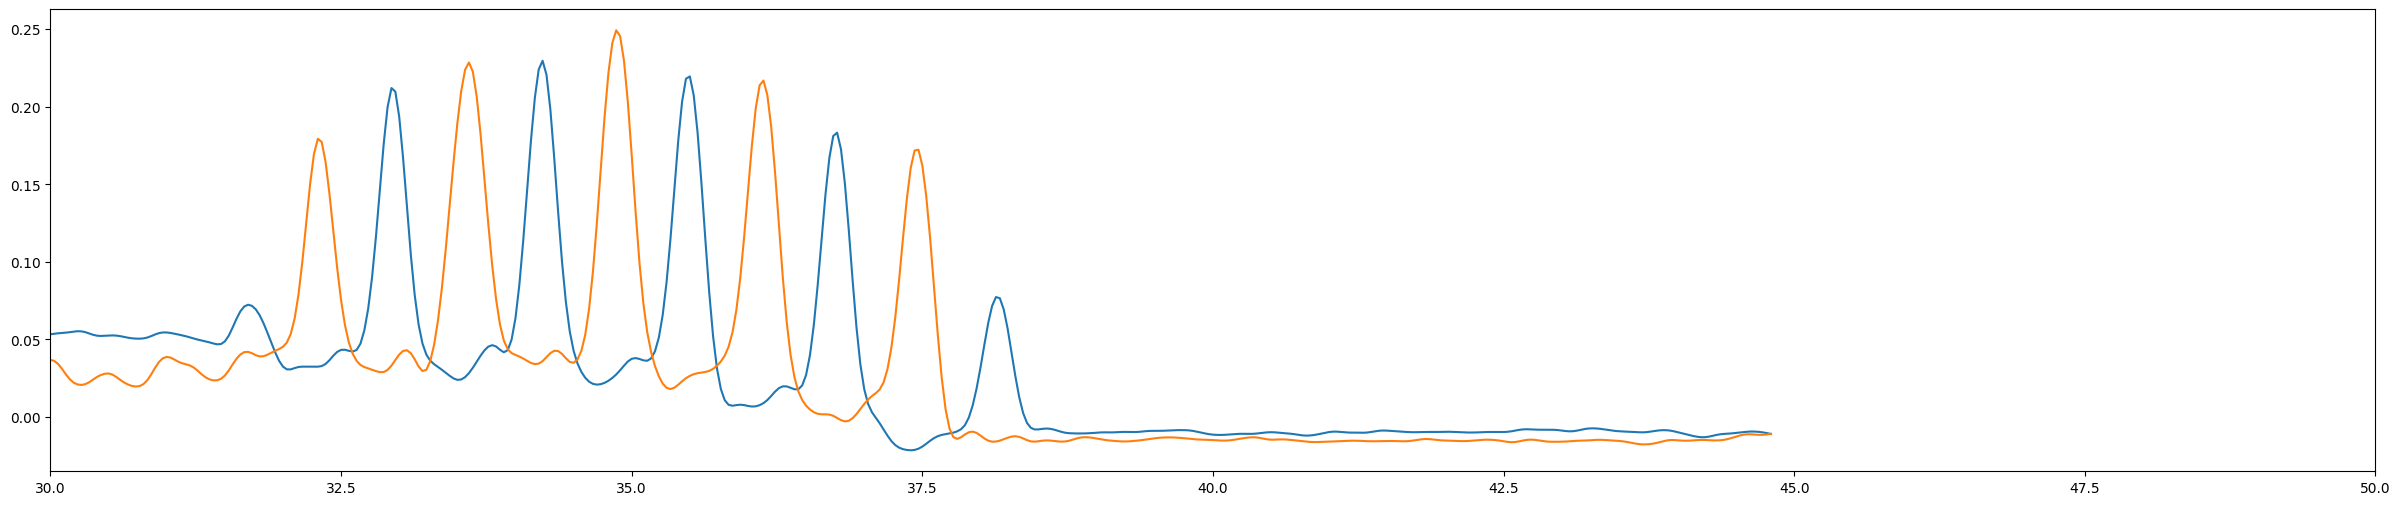

In [11]:
plt.rcParams["figure.figsize"] = (30,6)
t = np.arange(data['RHeel_Y'].shape[0]) / 30
plt.plot(t, data['RHeel_Y'])
plt.plot(t, data['LHeel_Y'])
plt.xlim(30, 50)

In [17]:

# Step 3: 計算座標變化量 (相鄰時間點的差值)
threshold = 0.1  # 設定變化量門檻
RHeel_y_diff = RHeel_y.diff().abs()
LHeel_y_diff = LHeel_y.diff().abs()

# Step 4: 過濾掉變化量小於門檻的數據，找出變化最顯著的時間點
RHeel_y_significant_change = RHeel_y_diff[RHeel_y_diff > threshold]
LHeel_y_significant_change = LHeel_y_diff[LHeel_y_diff > threshold]

# 找出 RHeel 和 LHeel 的第一個顯著變化時間點
if not RHeel_y_significant_change.empty:
    RHeel_first_significant_time = time[RHeel_y_significant_change.idxmax()]
else:
    RHeel_first_significant_time = time.max()

if not LHeel_y_significant_change.empty:
    LHeel_first_significant_time = time[LHeel_y_significant_change.idxmax()]
else:
    LHeel_first_significant_time = time.max()


print(RHeel_first_significant_time, LHeel_first_significant_time)
# 確定最早的顯著變化時間點
first_significant_time = min(RHeel_first_significant_time, LHeel_first_significant_time)

# Step 5: 過濾資料，並將時間調整為從 0 開始，Frame# 從 1 開始
filtered_data = data[time >= first_significant_time].copy()
filtered_data['Time'] = filtered_data['Time'] - first_significant_time  # 重設時間為從 0 開始
filtered_data['Frame#'] = range(1, len(filtered_data) + 1)  # Frame# 從 1 開始重新編號

# Step 6: 讀取檔案頭部元數據部分
with open(file_path, 'r') as file:
    header_lines = [file.readline() for _ in range(6)]

# Step 7: 將過濾後的數據與元數據一起寫入新的 .trc 檔案
with open(output_file_path, 'w') as file:
    # 寫入檔案頭部元數據
    for line in header_lines:
        file.write(line)
    
    # 寫入篩選後的數據
    filtered_data.to_csv(file, sep='\t', index=False)

print(f"已將過濾後的資料寫入 {output_file_path}，且時間和 Frame# 已重設。")

44.86666666666667 44.86666666666667
已將過濾後的資料寫入 output/filtered_trc_file.trc，且時間和 Frame# 已重設。
